# Data exploration (EDA)

In [6]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [7]:
# importing script modules from ../scripts
# Adding scripts path
import sys, os
sys.path.insert(0, '../scripts/')
from data_preProcessing import data_preProcessing_script
from data_manipulator import DataCleaner
from data_exploration import exploration

# Load Data

In [8]:
train_df = pd.read_csv("../data/data.csv")
train_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
preprocess = data_preProcessing_script(train_df)
preprocess.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
print('unique column values')
train_df.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(10)

unique column values


id                      569
smoothness_se           547
fractal_dimension_se    545
area_worst              544
concave points_mean     542
compactness_se          541
radius_se               540
area_mean               539
concavity_worst         539
compactness_mean        537
dtype: int64

# Missing Value Manipulation

In [11]:
preprocess.colums_WithMissingValue()

['Unnamed: 32']

In [12]:
preprocess.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
id,0,0.0 %
diagnosis,0,0.0 %
radius_mean,0,0.0 %
texture_mean,0,0.0 %
perimeter_mean,0,0.0 %
area_mean,0,0.0 %
smoothness_mean,0,0.0 %
compactness_mean,0,0.0 %
concavity_mean,0,0.0 %
concave points_mean,0,0.0 %


Text(0, 0.5, 'Features')

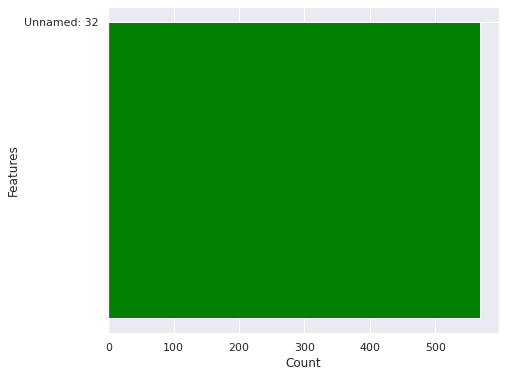

In [14]:
#cols_with_missing = [col for col in train.columns if train[col].isnull().any()]
cols_with_missing = train_df.isnull().sum()
cols_with_missing = cols_with_missing[cols_with_missing>0]
cols_with_missing.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(7,6))  
width = 0.70 # the width of the bars 
ind = np.arange(len(cols_with_missing))  # the x locations for the groups
ax.barh(ind, cols_with_missing, width, color="green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(cols_with_missing.index, minor=False)
plt.xlabel('Count')
plt.ylabel('Features') 

##### Unnamed: 32 columns mean nothing so these columns are dropped. Also, except for these columns, there is no missing data.

### Fixing missing values

In [15]:
train_df.drop(["Unnamed: 32"], axis=1, inplace=True)

In [16]:
preprocess.colums_WithMissingValue()

[]

# Data Wrangling

In [17]:
preprocess.show_datatypes()

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [18]:
#Knowing the shapes of our datasets
print('Shapes of our datasets')
print('-----------------------')
print(f'Training dataset:{train_df.shape}')

Shapes of our datasets
-----------------------
Training dataset:(569, 32)


In [19]:
train_df.drop(["id"], axis=1, inplace=True)

In [20]:
preprocess.show_data_description()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [21]:
preprocess.drop_duplicates()

In [22]:
train_df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
fractal_dimension_mean,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


In [23]:
train_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
# save the clean dataframe to a csv file
train_df.to_csv('../data/data.csv', index=False) # version 2 - id removed

In [25]:
# y includes our outcome label and X includes our features
y = train_df.diagnosis # M or B 
list_drp = ['diagnosis']
X = train_df.drop(list_drp,axis = 1 )

# Univariate Analysis

In [26]:
exploration = exploration()

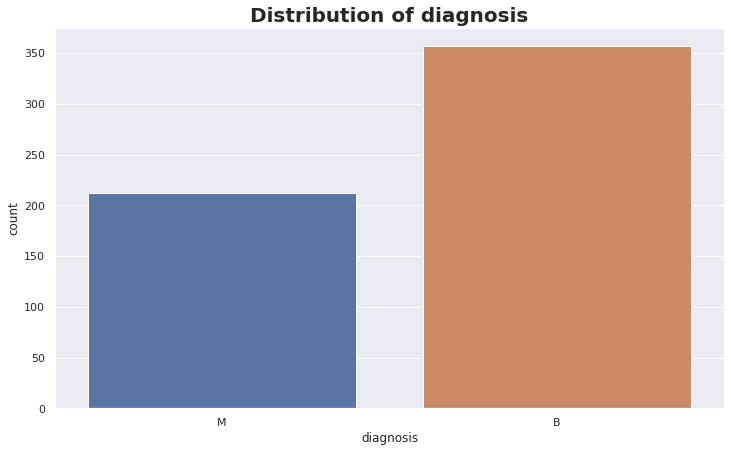

In [27]:
exploration.plot_count(train_df, 'diagnosis')

In [28]:
train_df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [29]:
# Check normal distribution of all numerical features
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(X)
normal = normal.apply(test_normality)
print(not normal.any())

False


In [32]:
train_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

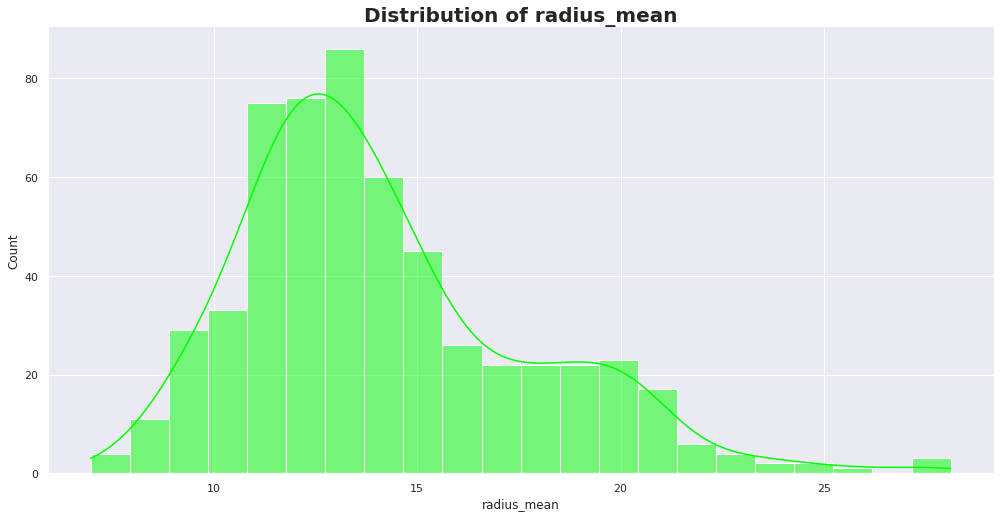

In [31]:
exploration.plot_hist(train_df, 'radius_mean', 'lime')

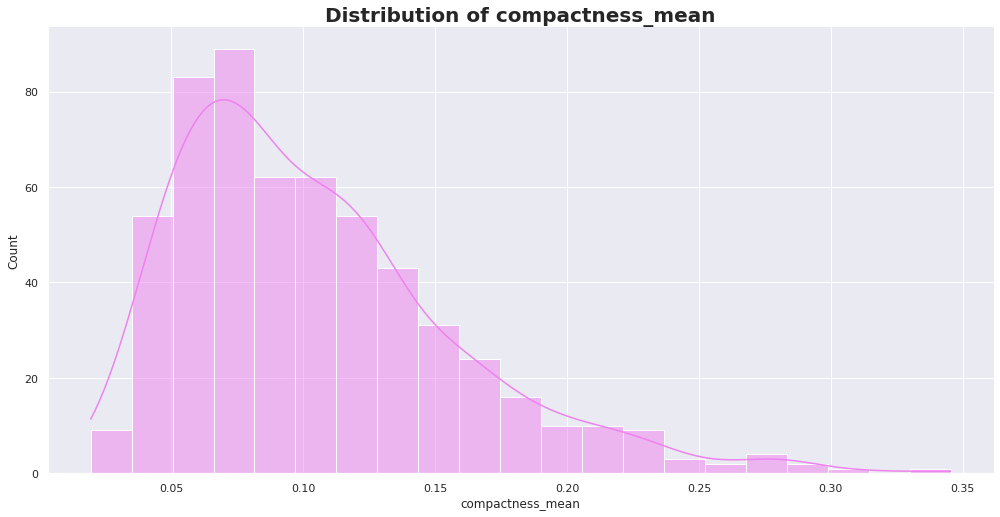

In [33]:
exploration.plot_hist(train_df, 'compactness_mean', 'violet')

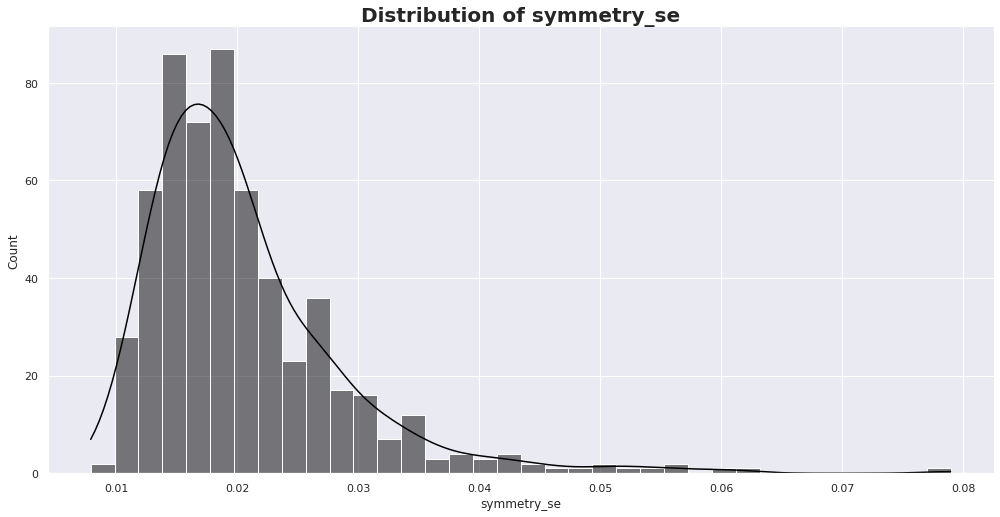

In [34]:
exploration.plot_hist(train_df, 'symmetry_se', 'black')

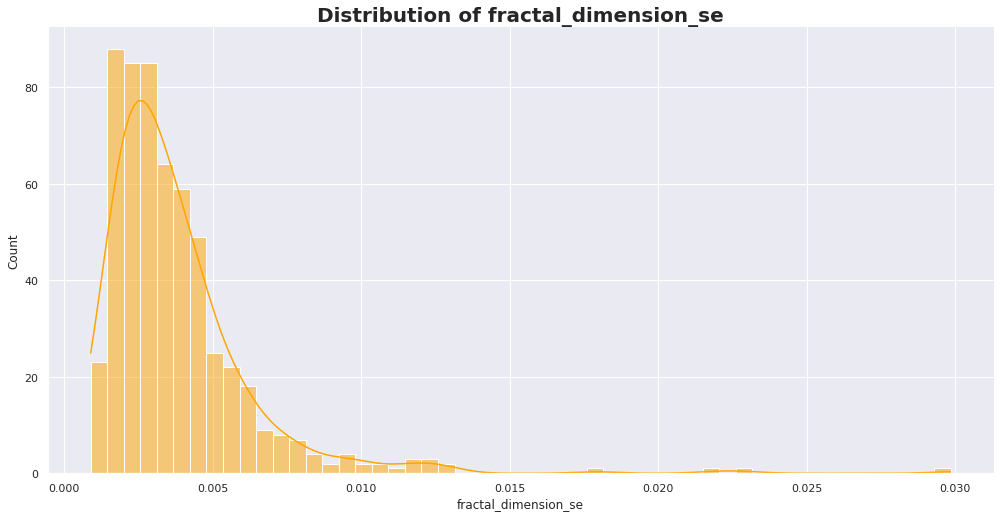

In [35]:
exploration.plot_hist(train_df, 'fractal_dimension_se', 'orange')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se')])

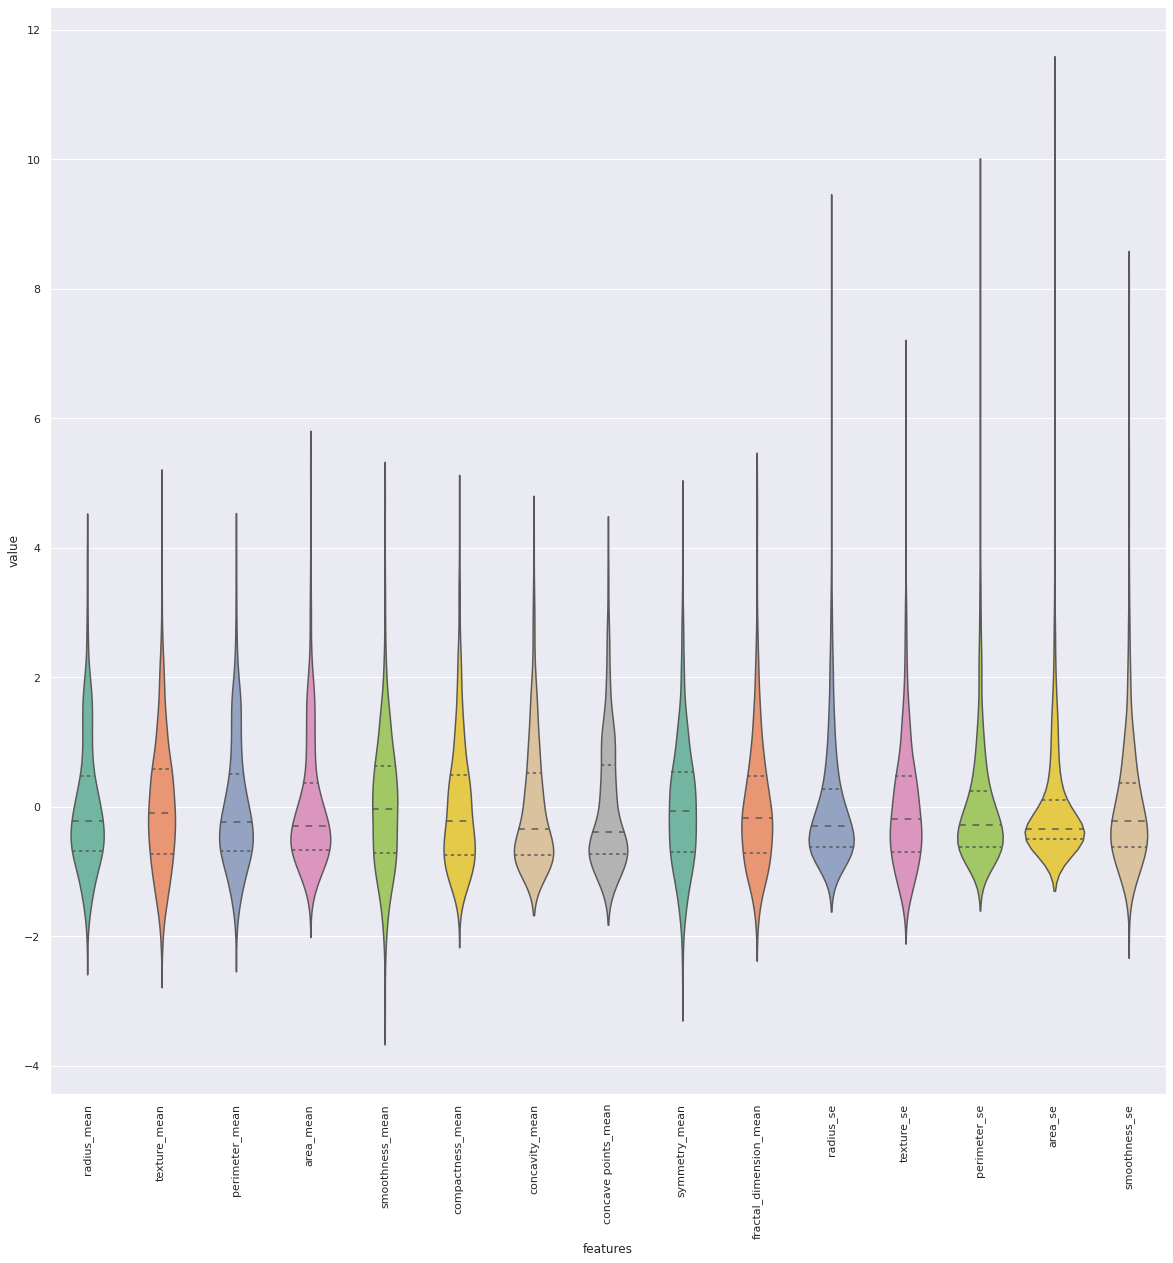

In [54]:
# First 15 features
data_dia = y
data = X
# standardization of the data
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y,data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,20))
sns.violinplot(x="features", y="value", data=data,split=True, inner="quart",palette ="Set2")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'concavity_se'),
  Text(1, 0, 'concave points_se'),
  Text(2, 0, 'symmetry_se'),
  Text(3, 0, 'fractal_dimension_se'),
  Text(4, 0, 'radius_worst'),
  Text(5, 0, 'texture_worst'),
  Text(6, 0, 'perimeter_worst'),
  Text(7, 0, 'area_worst'),
  Text(8, 0, 'smoothness_worst'),
  Text(9, 0, 'compactness_worst'),
  Text(10, 0, 'concavity_worst'),
  Text(11, 0, 'concave points_worst'),
  Text(12, 0, 'symmetry_worst'),
  Text(13, 0, 'fractal_dimension_worst')])

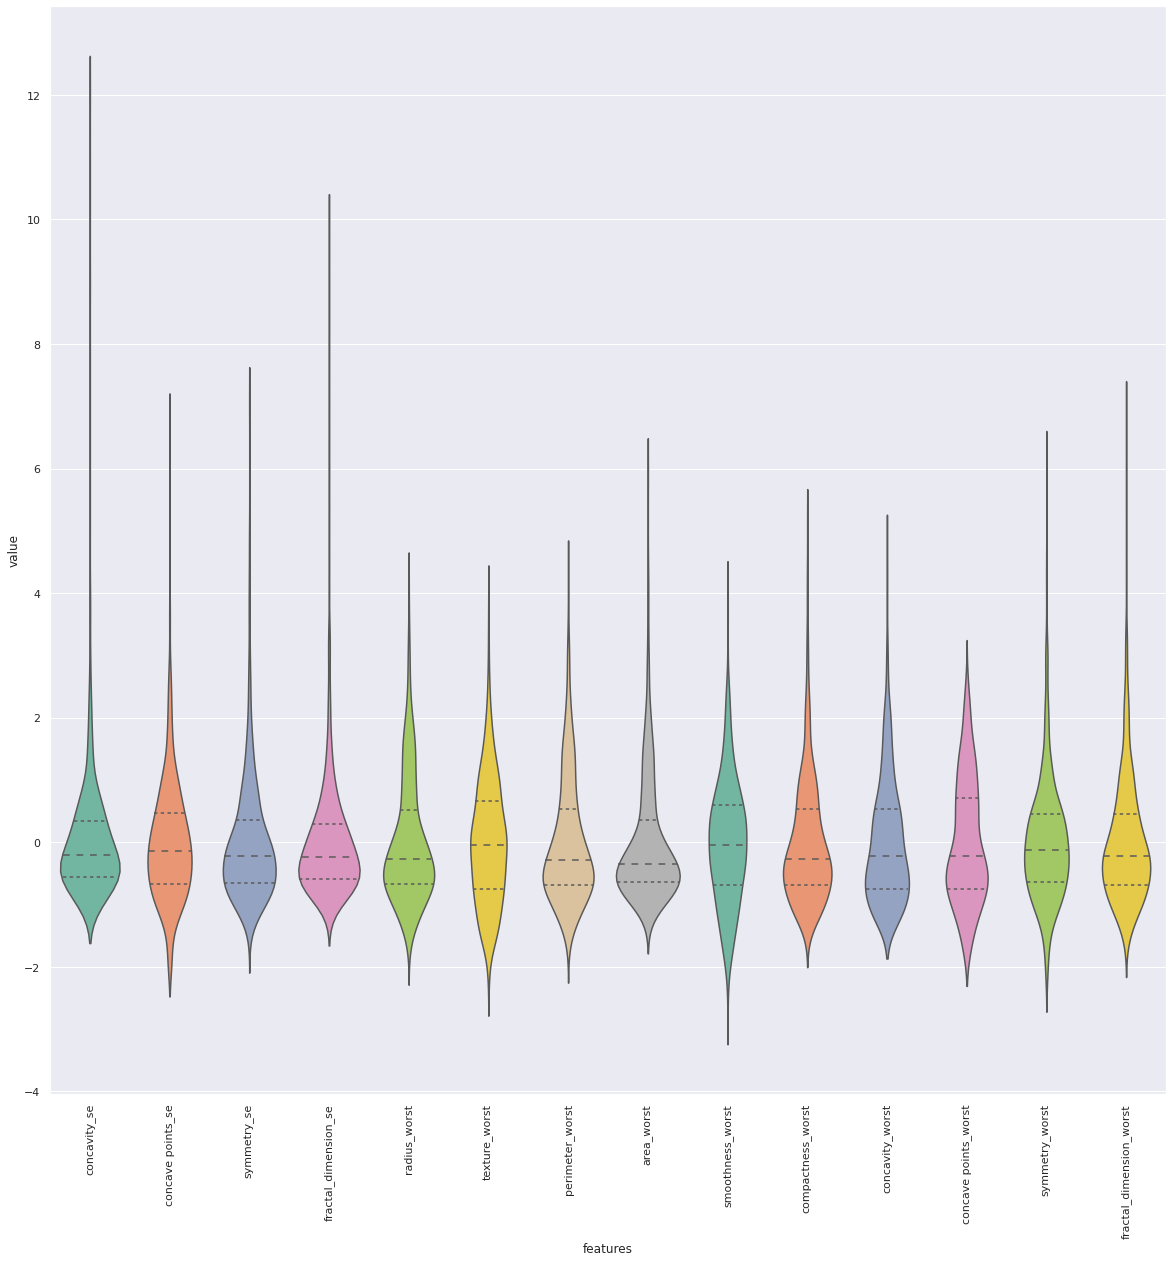

In [55]:
# Second 15 features
data_dia = y
data = X
# standardization of the data
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y,data_n_2.iloc[:,16:32]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,20))
sns.violinplot(x="features", y="value", data=data,split=True, inner="quart",palette ="Set2")
plt.xticks(rotation=90)

# Bivariate Analysis

# Outliers

In [ ]:
from data_exploration import exploration
exploration = exploration()

In [ ]:
train_df.columns

In [ ]:
exploration.plot_box(train_df, 'radius_mean', 'Outliers')

In [ ]:
exploration.plot_box(train_df, 'perimeter_mean', 'Outliers')

In [ ]:
exploration.plot_box(train_df, 'smoothness_mean', 'Outliers')

In [ ]:
exploration.plot_box(train_df, 'concavity_se', 'Outliers')

# Correlation Analysis